## Introduction

we will look into some of the technique and algos using which we can enhance the quality of old low resolution images.

## Setting up Environment

### Upgrade Libraries

In [ ]:
!pip install opencv-contrib-python --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import cv2
cv2.__version__

'4.7.0'

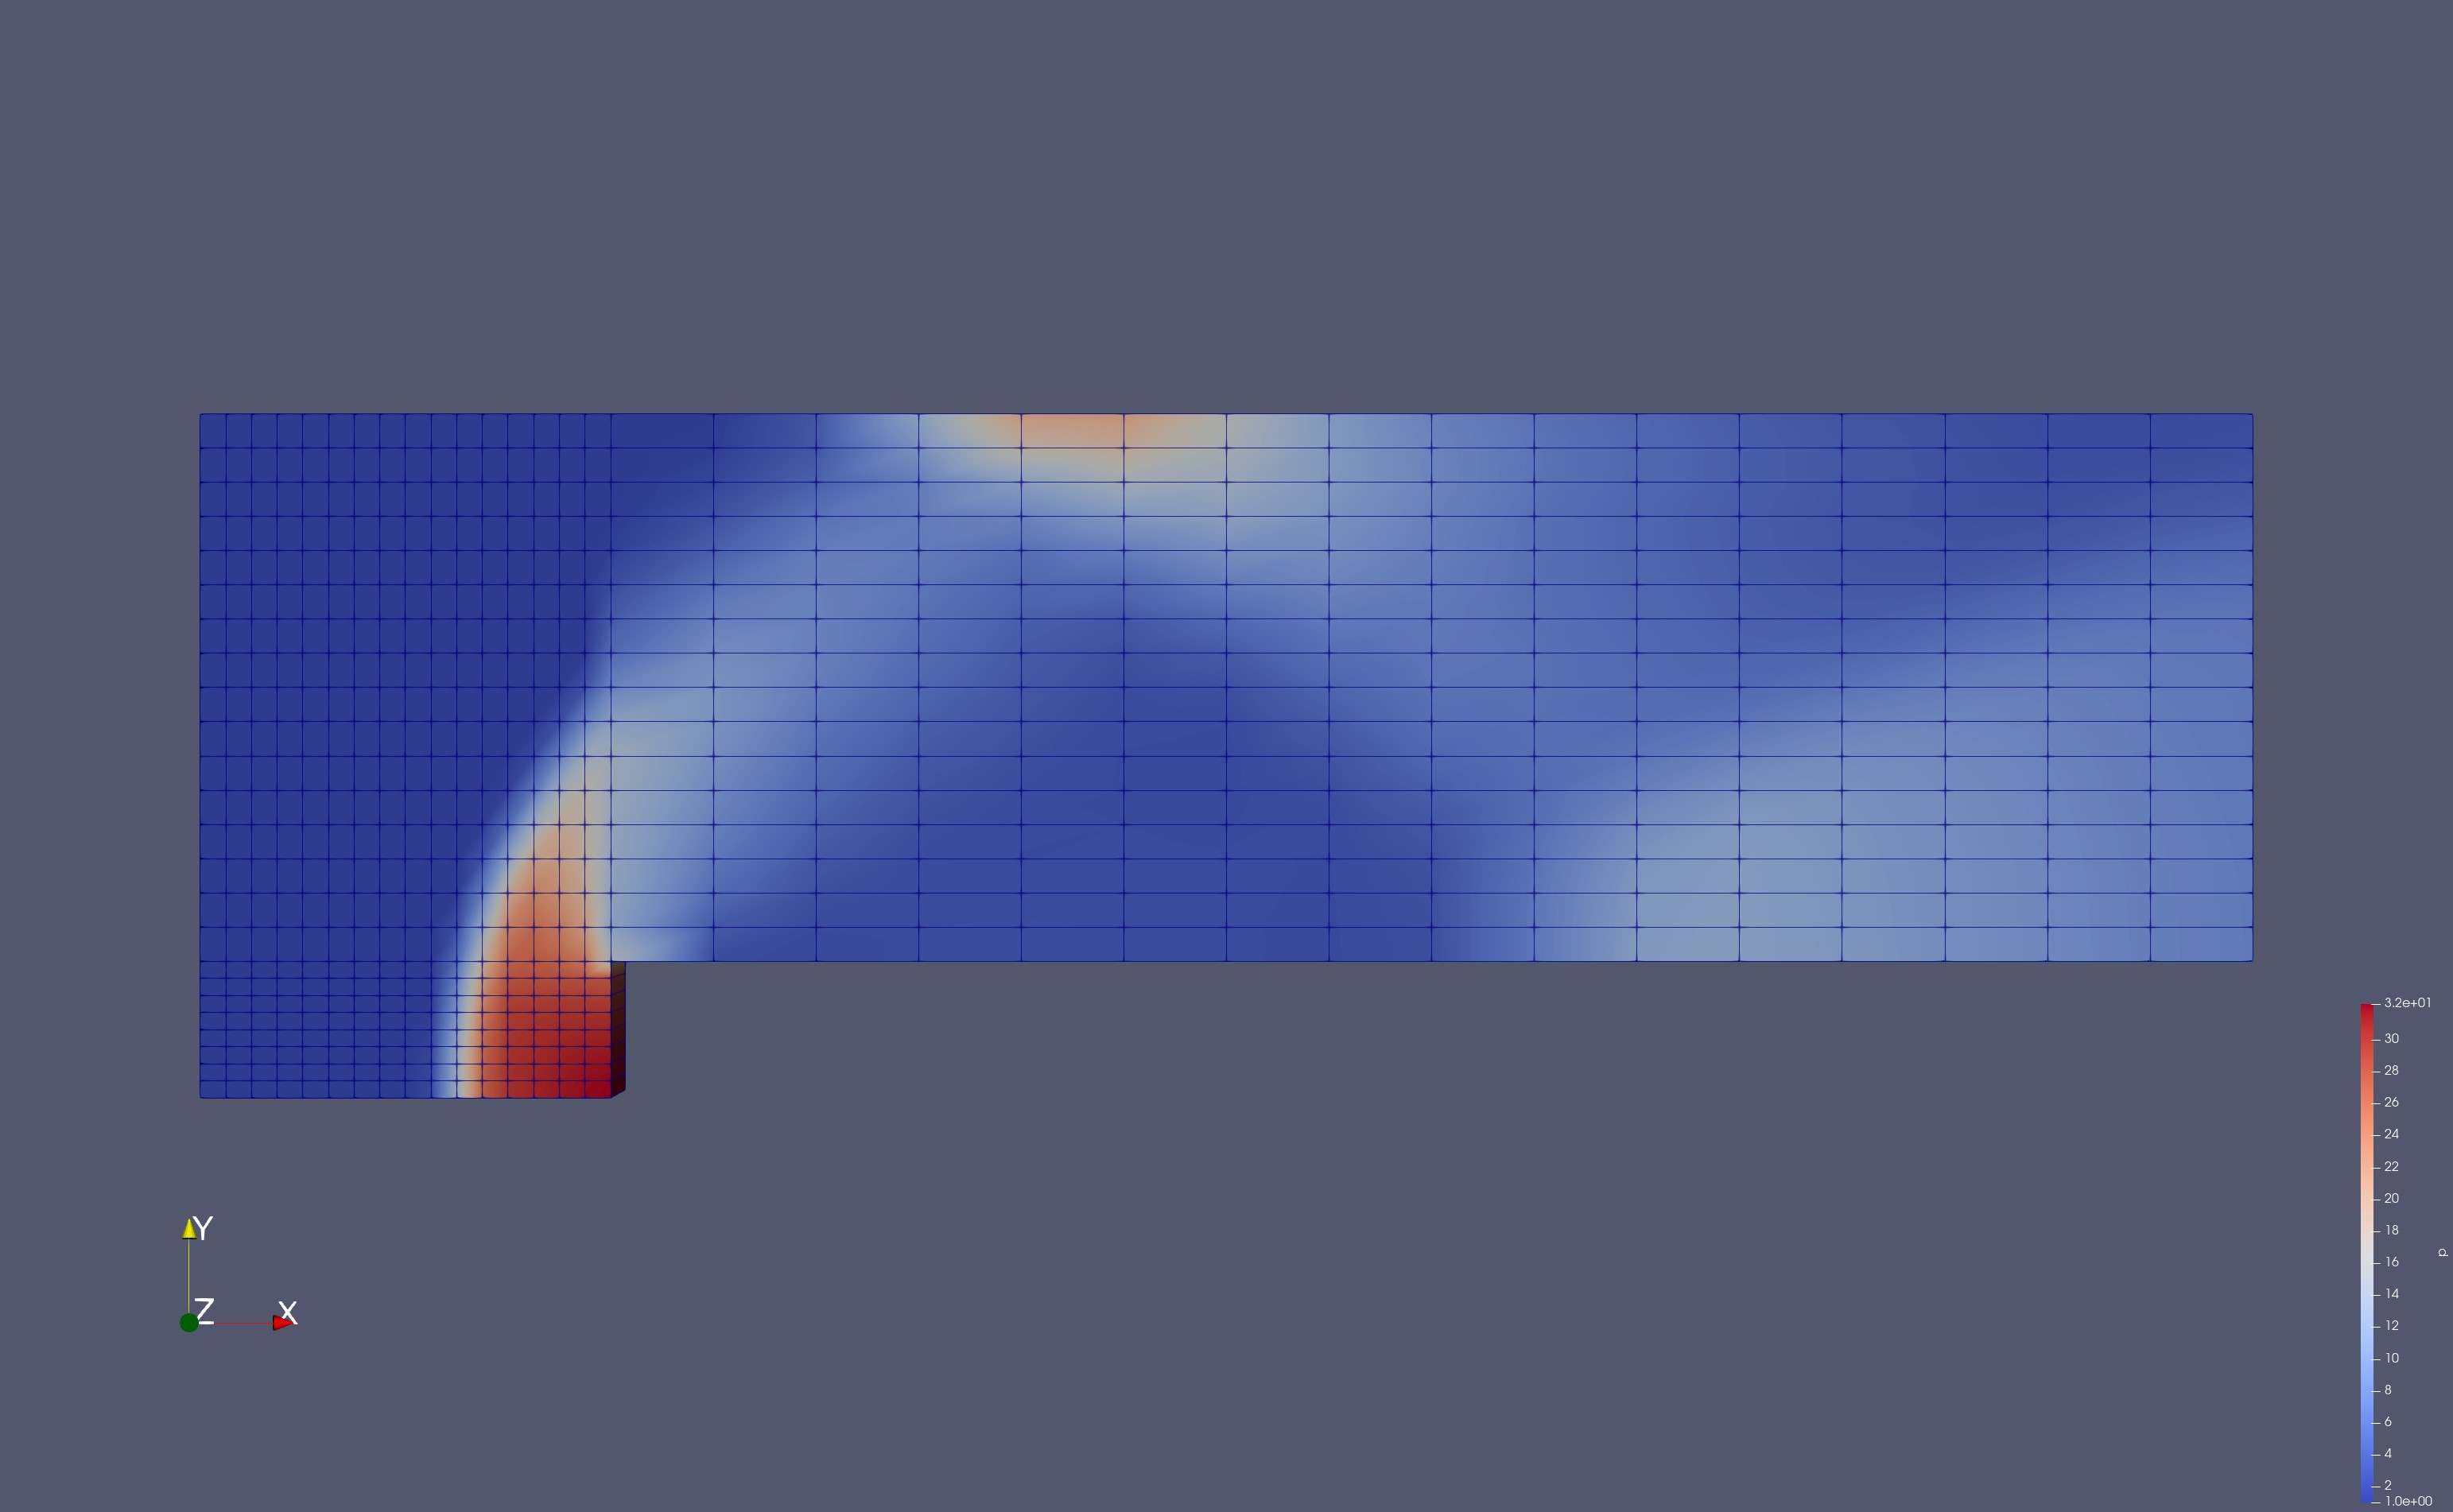

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
import os

img = cv2.imread('p.jpg', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

### Downsample images

> Here we are going to write some downsampling code through which we are going to generate some low resolution images

In [ ]:
import numpy as np

def downsample(img_file, scale=0.3, plot=False):
    img = cv2.imread(img_file, cv2.IMREAD_UNCHANGED)
    img_small = cv2.resize(img, (0,0), fx=scale, fy=scale, interpolation = cv2.INTER_NEAREST)
    return img, img_small

_, img_small = downsample('p.jpg', scale=0.1, plot=True)

In [ ]:
!rm -rf pretrained_models
!wget https://github.com/Saafke/EDSR_Tensorflow/raw/master/models/EDSR_x4.pb -P pretrained_models -q
!wget https://github.com/fannymonori/TF-ESPCN/raw/master/export/ESPCN_x4.pb -P pretrained_models -q
!wget https://github.com/Saafke/FSRCNN_Tensorflow/raw/master/models/FSRCNN_x4.pb -P pretrained_models -q
!wget https://github.com/fannymonori/TF-LapSRN/raw/master/export/LapSRN_x4.pb -P pretrained_models -q

In [ ]:
dir_pretrained_models = 'pretrained_models'
os.listdir(dir_pretrained_models)

['ESPCN_x4.pb', 'FSRCNN_x4.pb', 'LapSRN_x4.pb', 'EDSR_x4.pb']

In [ ]:
''' Model upscale any image using opencv and external pretrained models. '''
def get_upscaled_images(img_small, filemodel_filepath, modelname, scale):

    model_pretrained = cv2.dnn_superres.DnnSuperResImpl_create()
    print("Reading model file {}".format(filemodel_filepath))
  
    # setting up the model initialization
    model_pretrained.readModel(filemodel_filepath)
    model_pretrained.setModel(modelname, scale)
  
    # prediction or upscaling
    img_upscaled = model_pretrained.upsample(img_small)
    return img_upscaled

img, img_small = downsample('p.jpg', scale=0.25)
print(img.shape, img_small.shape)
img_upscaled1 = get_upscaled_images(img_small, "pretrained_models/EDSR_x4.pb", "edsr", 4)
img_upscaled2 = get_upscaled_images(img_small, "pretrained_models/ESPCN_x4.pb", "espcn", 4)
img_upscaled3 = get_upscaled_images(img_small, "pretrained_models/FSRCNN_x4.pb", "fsrcnn", 4)
img_upscaled4 = get_upscaled_images(img_small, "pretrained_models/LapSRN_x4.pb", "lapsrn", 4)

print(img_upscaled1.shape, img_upscaled2.shape, img_upscaled3.shape, img_upscaled4.shape)

(1902, 3085, 3) (476, 771, 3)
Reading model file pretrained_models/EDSR_x4.pb
Reading model file pretrained_models/ESPCN_x4.pb
Reading model file pretrained_models/FSRCNN_x4.pb
Reading model file pretrained_models/LapSRN_x4.pb
(1904, 3084, 3) (1904, 3084, 3) (1904, 3084, 3) (1904, 3084, 3)


In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

def plot_images(images, titles):
    fig = plt.figure(figsize=(20., 8.))
    grid = ImageGrid(fig, 111, nrows_ncols=(1, len(images)), axes_pad=0.1)

    i = 0
    for ax, img in zip(grid, images):
        ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        ax.set_title(titles[i])
        i += 1
    plt.show()

img_small_resize = cv2.resize(img_small, (img.shape[0], img.shape[1]))

titles = ["original", "downsampled", "edsr", "espcn", "fsrcnn", "lapsrn"]
images = [img, img_small_resize, img_upscaled1, img_upscaled2, img_upscaled3, img_upscaled4]
plot_images(images, titles)

## References

> https://docs.opencv.org/4.x/d8/d11/classcv_1_1dnn__superres_1_1DnnSuperResImpl.html<br>
>https://www.kaggle.com/datasets/scribbless/another-anime-face-dataset<br>
> https://learnopencv.com/super-resolution-in-opencv/<br>
> https://www.kaggle.com/code/akhileshdkapse/sr-super-resolution-gan-keras

https://huggingface.co/eugenesiow/han - еще одна upscale модель, даст качество примерно наравне с нашей
https://github.com/tensorlayer/srgan - может дать качество лучше, но времени попробовать не хватило
https://github.com/pankajr141/experiments/blob/master/Reasoning/ComputerVision/super_resolution_enhancing_image_quality_using_pretrained_models.ipynb - отсюда был взят наш код
